<AxesSubplot:>

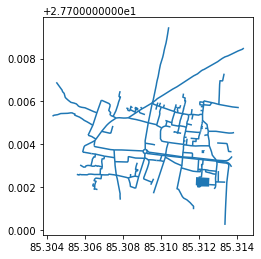

In [1]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np


geojson_file = "Files/ap_eeae3185-f989-4d0a-be95-77ee6ba01fe1_GeoJSON.geojson"
gdf = gpd.read_file(geojson_file)
gdf.plot()

In [2]:
gdf.head()

,osm_id,smoothness,building,bridge,surface,aeroway,barrier,name,layer,railway,operator,public_transport,capacity,oneway,width,amenity,parking,highway,tunnel,geometry
0,520752179,None,None,None,None,None,None,None,-1,None,None,None,None,None,None,None,None,path,None,"LINESTRING (85.30649 27.70203, 85.30639 27.702..."
1,180211675,None,None,None,None,None,None,Punche Galli,None,None,None,None,None,None,1,None,None,footway,None,"LINESTRING (85.30663 27.70188, 85.30654 27.701..."
2,1190745706,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,path,None,"LINESTRING (85.31158 27.70539, 85.31162 27.70564)"
3,1190745732,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,path,None,"LINESTRING (85.31086 27.70453, 85.31086 27.704..."
4,169188258,None,None,None,cobblestone,None,None,None,None,None,None,None,None,None,4,None,None,unclassified,None,"LINESTRING (85.30656 27.70424, 85.30634 27.704..."


In [3]:
column_names = gdf.columns
print(column_names)

Index(['osm_id', 'smoothness', 'building', 'bridge', 'surface', 'aeroway',
       'barrier', 'name', 'layer', 'railway', 'operator', 'public_transport',
       'capacity', 'oneway', 'width', 'amenity', 'parking', 'highway',
       'tunnel', 'geometry'],
      dtype='object')


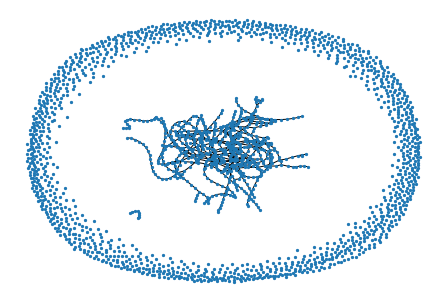

In [5]:
# Create an empty graph
G = nx.Graph()

# Iterate through each road segment and add nodes (intersections) and edges (roads)
for index, row in gdf.iterrows():
    # Get the geometry of the road segment
    geometry = row['geometry']
    
    # Extract the coordinates of the start and end points of the road segment
    if geometry.geom_type == 'LineString':
        coordinates = list(geometry.coords)
    elif geometry.geom_type == 'MultiLineString':
        coordinates = [list(line.coords) for line in geometry]
    
    # Add nodes (intersections) to the graph
    for coord in coordinates:
        for node_coord in coord:
            G.add_node(node_coord)
    
    # Add edges (roads) to the graph
    for i in range(len(coordinates) - 1):
        G.add_edge(coordinates[i], coordinates[i + 1])

# Layout the nodes using the spring layout algorithm
pos = nx.spring_layout(G, seed=42)

# Plot the road network graph
nx.draw(G, pos, node_size=5, with_labels=False)
plt.show()

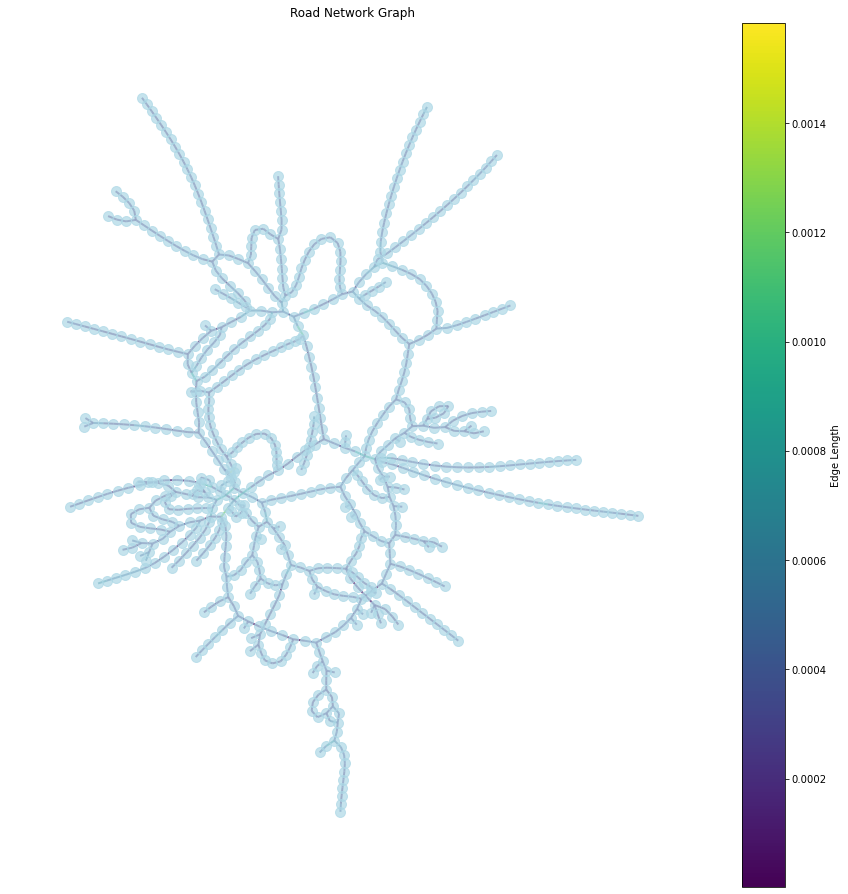

In [6]:
# Create an empty graph
G = nx.Graph()

# Create a dictionary to store unique nodes and their attributes
unique_nodes = {}

# Iterate through each road segment and add nodes (intersections) and edges (roads)
for index, row in gdf.iterrows():
    # Get attributes for the road segment
    attributes = {key: row[key] for key in row.index if key != 'geometry'}
    
    # Get the geometry of the road segment
    geometry = row['geometry']
    
    # Extract the coordinates of the start and end points of the road segment
    if geometry.geom_type == 'LineString':
        coordinates = list(geometry.coords)
    elif geometry.geom_type == 'MultiLineString':
        coordinates = [list(line.coords) for line in geometry]
    
    # Add nodes (intersections) to the graph and store attributes
    for coord in coordinates:
        for node_coord in coord:
            if node_coord not in unique_nodes:
                unique_nodes[node_coord] = attributes
            G.add_node(node_coord, **unique_nodes[node_coord])
    
    # Add edges (roads) to the graph with attributes (e.g., length)
    for i in range(len(coordinates) - 1):
        point1 = Point(coordinates[i])
        point2 = Point(coordinates[i + 1])
        edge_data = {
            'length': point1.distance(point2)
        }
        G.add_edge(coordinates[i], coordinates[i + 1], **edge_data)

# Remove nodes with no edges
isolated_nodes = [node for node in G.nodes() if G.degree[node] == 0]
G.remove_nodes_from(isolated_nodes)

# Layout the nodes using the spring layout algorithm
pos = nx.kamada_kawai_layout(G)

# Create a colormap for edge lengths
edge_colors = [data['length'] for u, v, data in G.edges(data=True)]
cmap = plt.get_cmap('viridis')

# Plot the road network graph with node labels, edge colors, and styling
plt.figure(figsize=(12, 12))
nx.draw(
    G,
    pos,
    node_size=100,
    node_color='lightblue',
    labels=None,
    font_size=8,
    with_labels=False,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
    alpha=0.7,
)

# Manually create a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(edge_colors), vmax=max(edge_colors)))
sm.set_array([])
cbar = plt.colorbar(sm, label='Edge Length')

plt.title('Road Network Graph')
plt.axis('off')
plt.show()


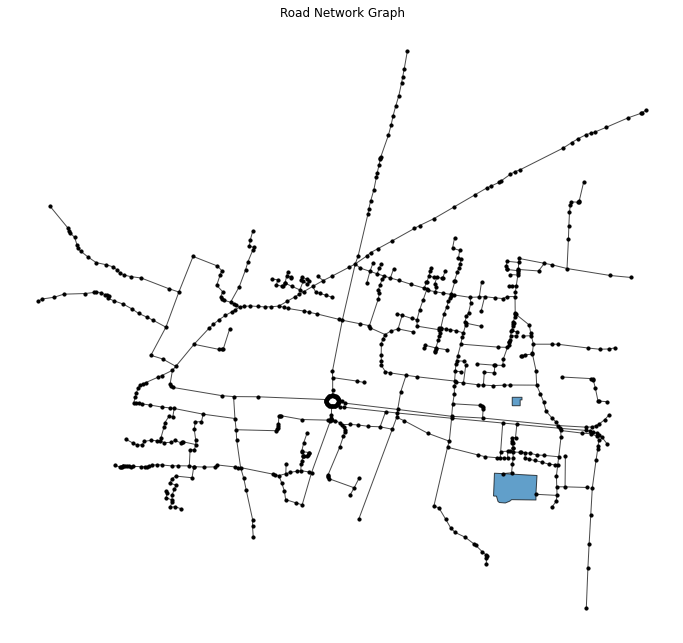

In [7]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load GeoJSON file
geojson_file = "Files/ap_eeae3185-f989-4d0a-be95-77ee6ba01fe1_GeoJSON.geojson"
gdf = gpd.read_file(geojson_file)

# Create an empty graph
G = nx.Graph()

# Create a dictionary to store unique nodes and their attributes
unique_nodes = {}

# Iterate through each road segment and add nodes (intersections) and edges (roads)
for index, row in gdf.iterrows():
    # Get attributes for the road segment
    attributes = {key: row[key] for key in row.index if key != 'geometry'}
    
    # Get the geometry of the road segment
    geometry = row['geometry']
    
    # Extract the coordinates of the start and end points of the road segment
    if geometry.geom_type == 'LineString':
        coordinates = list(geometry.coords)
    elif geometry.geom_type == 'MultiLineString':
        coordinates = [list(line.coords) for line in geometry]
# Add nodes (intersections) to the graph and store attributes
    for coord in coordinates:
        for node_coord in coord:
            if node_coord not in unique_nodes:
                unique_nodes[node_coord] = attributes
            G.add_node(node_coord, **unique_nodes[node_coord])
    
    # Add edges (roads) to the graph with attributes (e.g., length)
    for i in range(len(coordinates) - 1):
        point1 = Point(coordinates[i])
        point2 = Point(coordinates[i + 1])
        edge_data = {
            'length': point1.distance(point2)
        }
        G.add_edge(coordinates[i], coordinates[i + 1], **edge_data)

# Remove nodes with no edges
isolated_nodes = [node for node in G.nodes() if G.degree[node] == 0]
G.remove_nodes_from(isolated_nodes)

# Create a GeoDataFrame from the nodes for plotting
node_gdf = gpd.GeoDataFrame(G.nodes(data=True), columns=['geometry', 'attributes'])
node_gdf['geometry'] = node_gdf['geometry'].apply(Point)

# Set the geometry column explicitly
node_gdf = node_gdf.set_geometry('geometry')

# Plot the GeoDataFrame as the background
ax = gdf.plot(figsize=(12, 12), alpha=0.7, linewidth=1, edgecolor='k')

# Plot the nodes on top of the background
node_gdf.plot(ax=ax, markersize=10, color='black')

plt.title('Road Network Graph')
plt.axis('off')
plt.show()


In [8]:
# Create an array with node indices and coordinates
node_array = np.array([(i+1, point.coords[0]) for i, point in enumerate(node_gdf.geometry)], dtype=[('Index', int), ('Coordinates', 'O')])

# Now you have a node_array where the first column is the index and the second column is the coordinates
print(node_array)

[(  1, (85.3064929, 27.7020263)) (  2, (85.3063922, 27.7020626))
 (  3, (85.3064178, 27.7021463)) (  4, (85.3063935, 27.7021684))
 (  5, (85.3066349, 27.7018824)) (  6, (85.3065439, 27.7019145))
 (  7, (85.3064619, 27.7019033)) (  8, (85.3064937, 27.7019935))
 (  9, (85.3064943, 27.7021003)) ( 10, (85.3065314, 27.7022102))
 ( 11, (85.3065647, 27.7022713)) ( 12, (85.3064605, 27.7023015))
 ( 13, (85.3064897, 27.7023763)) ( 14, (85.3065535, 27.7024213))
 ( 15, (85.3068248, 27.7023935)) ( 16, (85.3068516, 27.7025668))
 ( 17, (85.3068538, 27.702577)) ( 18, (85.3115815, 27.7053872))
 ( 19, (85.3116193, 27.705641)) ( 20, (85.3108598, 27.7045336))
 ( 21, (85.3108625, 27.7045424)) ( 22, (85.311044, 27.7045131))
 ( 23, (85.3065562, 27.7042387)) ( 24, (85.3063356, 27.7043613))
 ( 25, (85.306143, 27.7044207)) ( 26, (85.3078381, 27.7014144))
 ( 27, (85.3078261, 27.7015921)) ( 28, (85.3078287, 27.7016973))
 ( 29, (85.3077228, 27.7021834)) ( 30, (85.3076812, 27.7023824))
 ( 31, (85.3076289, 27.702561

In [9]:

# Define the start and end points
start_point = (85.3064178, 27.7021463)  # Replace with actual coordinates
end_point = (85.3137288, 27.7034315)        # Replace with actual coordinates

# Use NetworkX's built-in shortest_path function to find the shortest path
shortest_path = nx.shortest_path(G, source=start_point, target=end_point, weight='length')

# You can then extract the geometry of the shortest path and visualize it if needed
shortest_path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
#shortest_path_line = LineString([Point(node) for node in shortest_path])
shortest_path_edges
shortest_path


[(85.3064178, 27.7021463),
 (85.3063922, 27.7020626),
 (85.3064929, 27.7020263),
 (85.3064943, 27.7021003),
 (85.3065314, 27.7022102),
 (85.3065647, 27.7022713),
 (85.3064605, 27.7023015),
 (85.3064897, 27.7023763),
 (85.3065535, 27.7024213),
 (85.3068248, 27.7023935),
 (85.3068516, 27.7025668),
 (85.3068538, 27.702577),
 (85.3070254, 27.70257),
 (85.3072083, 27.7025731),
 (85.3072363, 27.702606),
 (85.307528, 27.7025732),
 (85.3075897, 27.7025607),
 (85.3076289, 27.7025616),
 (85.3081683, 27.7024522),
 (85.3082065, 27.702442),
 (85.3082611, 27.7024286),
 (85.3083774, 27.7024601),
 (85.3084496, 27.7024816),
 (85.30857, 27.7025032),
 (85.3086253, 27.702512),
 (85.3087581, 27.7024889),
 (85.3088029, 27.7024762),
 (85.3091169, 27.7033399),
 (85.3091259, 27.703365),
 (85.3091497, 27.7033542),
 (85.309198, 27.7033394),
 (85.3092731, 27.7033014),
 (85.309306, 27.7032735),
 (85.309434, 27.7032764),
 (85.3095661, 27.7032681),
 (85.3097438, 27.703245),
 (85.3099383, 27.7032369),
 (85.3100302, 2

In [10]:
import xml.etree.ElementTree as ET

# Create the root element for the node file for SUMO network
node_root_elem = ET.Element("nodes")

# Iterate through nodes and add them to the node file network
for node, attributes in G.nodes(data=True):
    x, y = node  # Extract the x and y coordinates
    node_id = f"{x}{y}".replace(".", "")  # Assuming node is a unique identifier
    
    # Create a node element
    node_elem = ET.SubElement(node_root_elem, "node")
    node_elem.set("id", node_id)
    node_elem.set("x", str(x))
    node_elem.set("y", str(y))
    
    # Add attributes to the node element
    for key, value in attributes.items():
        attr_elem = ET.SubElement(node_elem, "param")
        attr_elem.set("key", key)
        attr_elem.set("value", str(value))

# Iterate through edges and add them to the SUMO network
edge_root_elem = ET.Element("edges")
for u, v, edge_data in G.edges(data=True):
    length = edge_data['length']
    # Assuming u and v are node IDs
    x1,y1 = u
    x2,y2 = v
    
    # Create an edge element
    edge_elem = ET.SubElement(edge_root_elem, "edge")
    edge_elem.set("id", f"{x1}{y1}_{x2}{y2}".replace(".",""))
    edge_elem.set("from", f"{x1}{y1}".replace(".",""))
    edge_elem.set("to", f"{x2}{y2}".replace(".",""))
    edge_elem.set("length", str(length))

# Create an ElementTree object and write it to a file
edgetree = ET.ElementTree(edge_root_elem)
nodetree = ET.ElementTree(node_root_elem)
node_network_file = "your_nodes.nod.xml"
edge_network_file = "your_edges.edg.xml"
nodetree.write(node_network_file, encoding="UTF-8", xml_declaration=True)
edgetree.write(edge_network_file, encoding="UTF-8", xml_declaration=True)

print(f"SUMO nodes definition saved to {node_network_file}")
print(f"SUMO edges definition saved to {edge_network_file}")

SUMO nodes definition saved to your_nodes.nod.xml
SUMO edges definition saved to your_edges.edg.xml
